# Mall Customer Segmentation

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customer_Segmentation/Mall_Customers.xls')

## Basic Checks

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [11]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
data.duplicated().sum()

0

## Exploratory Data Analysis

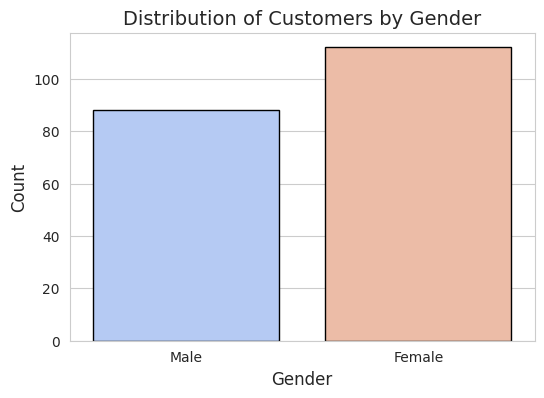

In [14]:
# For categorical column

# Set style
sns.set_style("whitegrid")

# Create count plot with enhancements
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Gender'], palette='coolwarm', edgecolor='black')

# Add labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Customers by Gender", fontsize=14)

# Show the plot
plt.show()

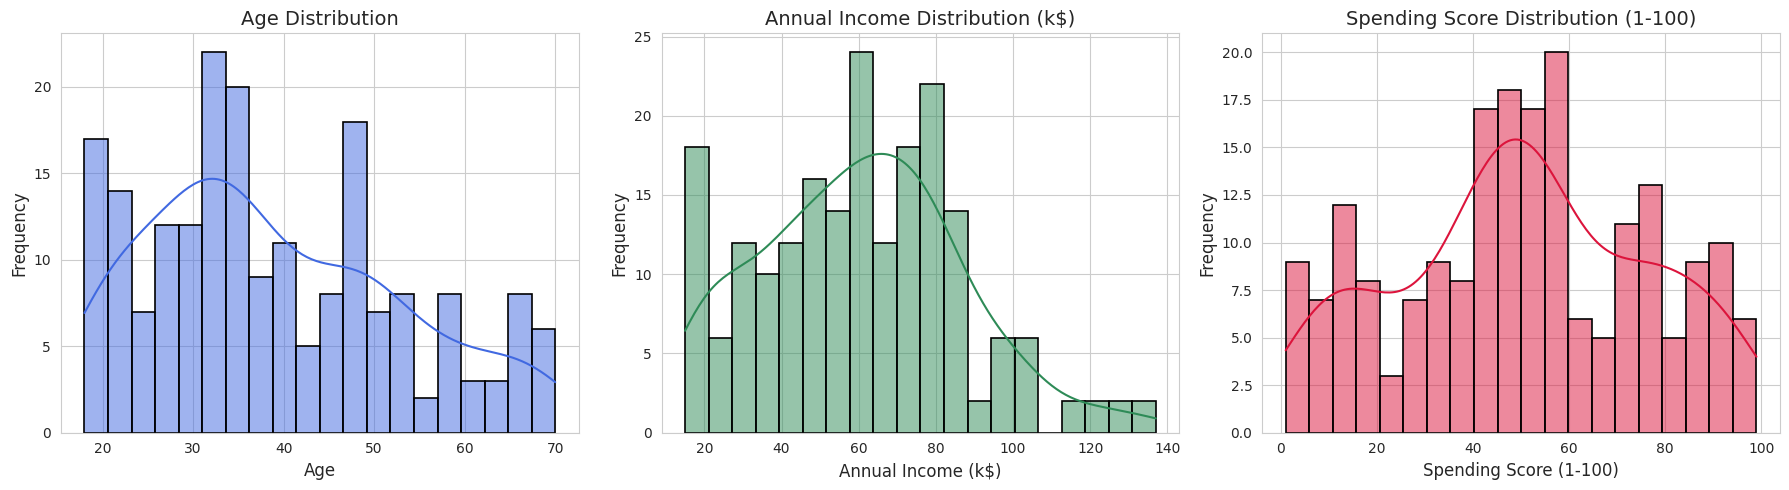

In [15]:
# For numerical column

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with improved size
plt.figure(figsize=(18, 5))

# Define color palette
colors = ['royalblue', 'seagreen', 'crimson']
titles = ['Age Distribution', 'Annual Income Distribution (k$)', 'Spending Score Distribution (1-100)']
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Loop through subplots to reduce repetition
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[columns[i]], kde=True, color=colors[i], bins=20, edgecolor='black', linewidth=1.2)
    plt.title(titles[i], fontsize=14)
    plt.xlabel(columns[i], fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

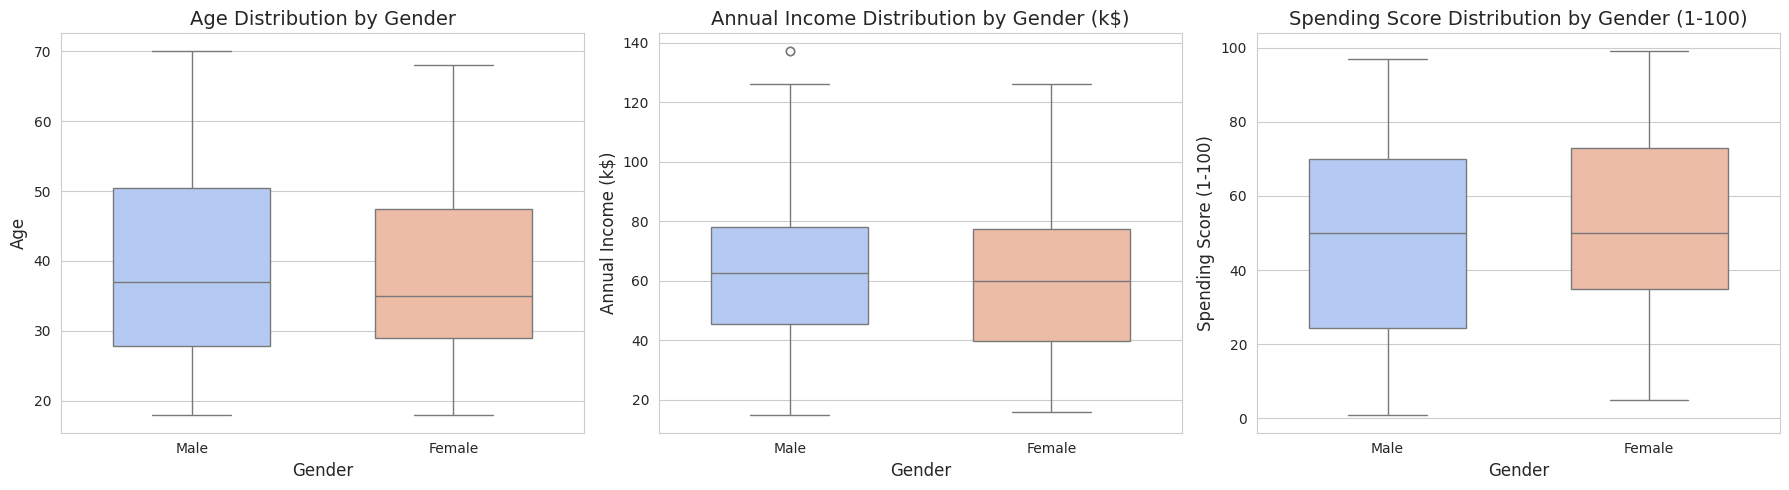

In [16]:
# Box plot

# Set seaborn style
sns.set_style("whitegrid")

# Create a figure with improved size
plt.figure(figsize=(18, 5))

# Define titles and labels
titles = [
    "Age Distribution by Gender",
    "Annual Income Distribution by Gender (k$)",
    "Spending Score Distribution by Gender (1-100)"
]
y_labels = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Loop through subplots to make the code cleaner
for i, col in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x="Gender", y=col, data=data, palette="coolwarm", width=0.6, showfliers=True)
    plt.title(titles[i], fontsize=14)
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel(y_labels[i], fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

In [17]:
data['Age'].describe()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


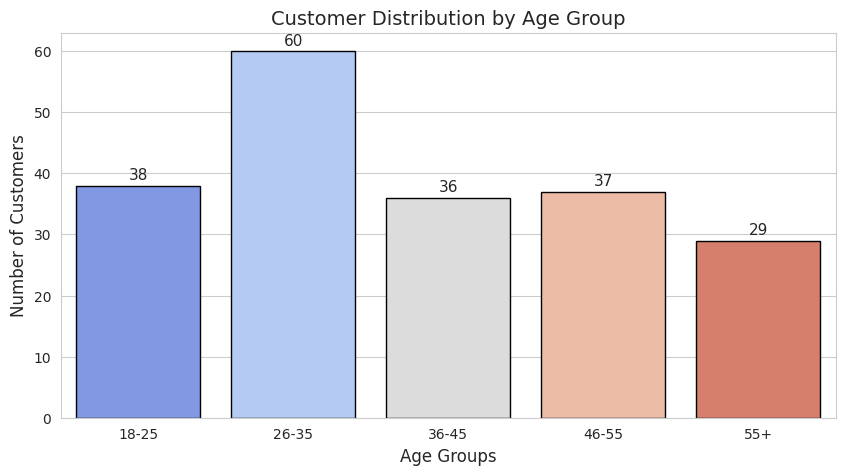

In [18]:
# Define age group labels and counts
age_groups = ['18-25', '26-35', '36-45', '46-55', '55+']
age_counts = [
    sum((data['Age'] >= 18) & (data['Age'] <= 25)),
    sum((data['Age'] >= 26) & (data['Age'] <= 35)),
    sum((data['Age'] >= 36) & (data['Age'] <= 45)),
    sum((data['Age'] >= 46) & (data['Age'] <= 55)),
    sum(data['Age'] >= 56)
]

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Improved barplot
sns.barplot(x=age_groups, y=age_counts, palette="coolwarm", edgecolor="black")

# Titles and labels
plt.title("Customer Distribution by Age Group", fontsize=14)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Display values on bars
for i, count in enumerate(age_counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=11)

# Show plot
plt.show()

In [19]:
data['Annual Income (k$)'].describe()

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


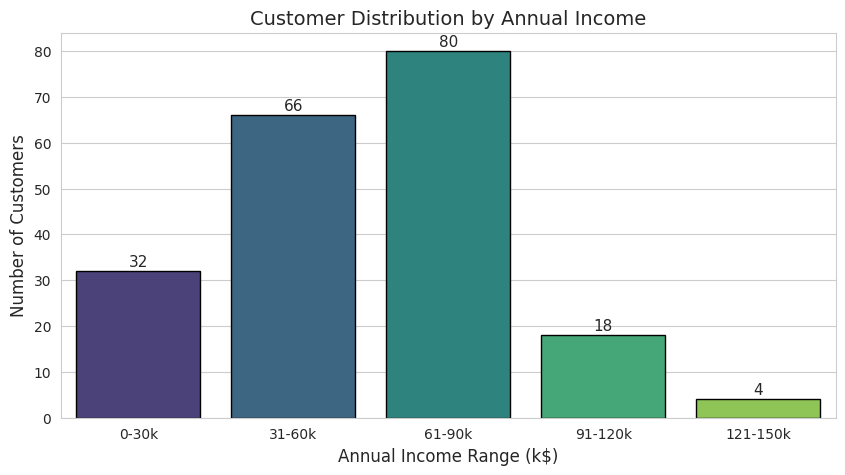

In [20]:
# Define income group labels and counts
income_groups = ['0-30k', '31-60k', '61-90k', '91-120k', '121-150k']
income_counts = [
    sum((data['Annual Income (k$)'] >= 0) & (data['Annual Income (k$)'] <= 30)),
    sum((data['Annual Income (k$)'] >= 31) & (data['Annual Income (k$)'] <= 60)),
    sum((data['Annual Income (k$)'] >= 61) & (data['Annual Income (k$)'] <= 90)),
    sum((data['Annual Income (k$)'] >= 91) & (data['Annual Income (k$)'] <= 120)),
    sum((data['Annual Income (k$)'] >= 121) & (data['Annual Income (k$)'] <= 150))
]

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Improved barplot
sns.barplot(x=income_groups, y=income_counts, palette="viridis", edgecolor="black")

# Titles and labels
plt.title("Customer Distribution by Annual Income", fontsize=14)
plt.xlabel("Annual Income Range (k$)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Display values on bars
for i, count in enumerate(income_counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=11)

# Show plot
plt.show()

In [21]:
data['Spending Score (1-100)'].describe()

,Spending Score (1-100)
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


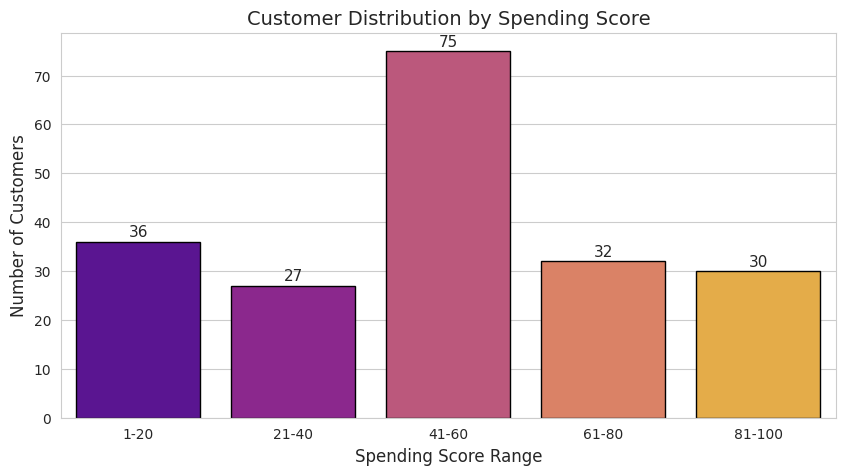

In [22]:
# Define spending score group labels and counts
spending_groups = ['1-20', '21-40', '41-60', '61-80', '81-100']
spending_counts = [
    sum((data['Spending Score (1-100)'] >= 1) & (data['Spending Score (1-100)'] <= 20)),
    sum((data['Spending Score (1-100)'] >= 21) & (data['Spending Score (1-100)'] <= 40)),
    sum((data['Spending Score (1-100)'] >= 41) & (data['Spending Score (1-100)'] <= 60)),
    sum((data['Spending Score (1-100)'] >= 61) & (data['Spending Score (1-100)'] <= 80)),
    sum((data['Spending Score (1-100)'] >= 81) & (data['Spending Score (1-100)'] <= 100))
]

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Improved barplot
sns.barplot(x=spending_groups, y=spending_counts, palette="plasma", edgecolor="black")

# Titles and labels
plt.title("Customer Distribution by Spending Score", fontsize=14)
plt.xlabel("Spending Score Range", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Display values on bars
for i, count in enumerate(spending_counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=11)

# Show plot
plt.show()

## Feature Engineering

In [26]:
# Remove 'CustomerID' column
data.drop('CustomerID', axis=1, inplace=True)

## Split data

In [28]:
# K-Means requires numerical data, so we select relevant columns
numerical_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [29]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_data = scaler.fit_transform(numerical_data)

## Model Building

### KMeans

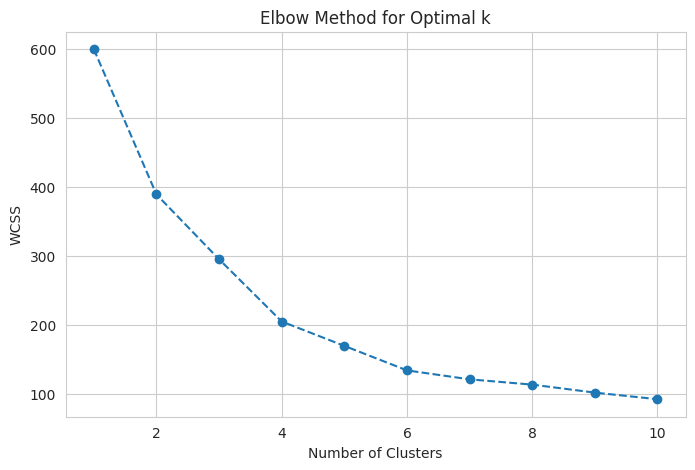

In [32]:
# Find the optimal value for K

from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(numerical_data)
    wcss.append(kmeans.inertia_)  # Inertia = Sum of squared distances to the cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [33]:
# Optimal value for K is 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(numerical_data)

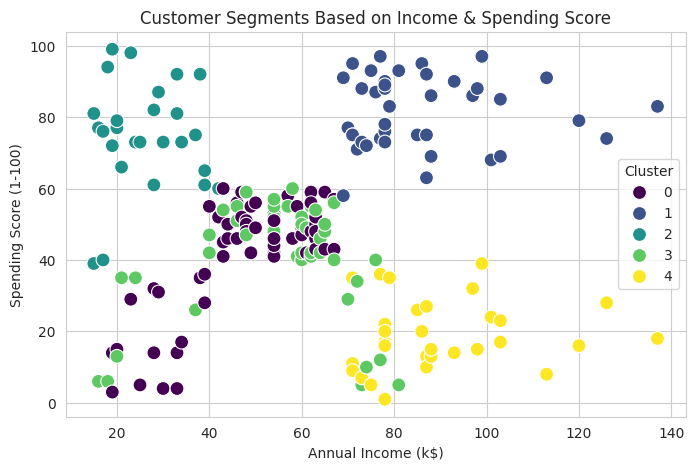

In [34]:
# Visualize clusters

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments Based on Income & Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title="Cluster")
plt.show()

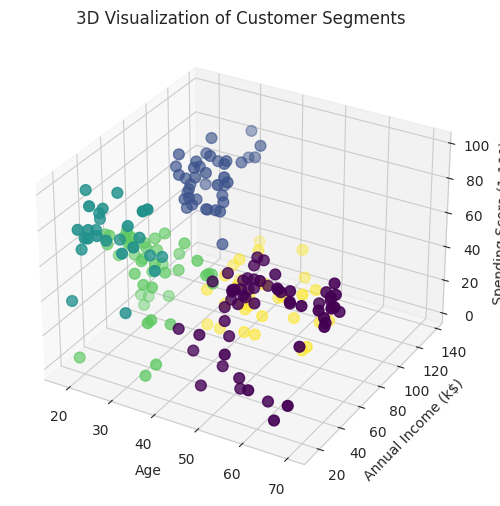

In [35]:
# For 3D visualization

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of Customer Segments')
plt.show()

### DBSCAN

In [40]:
# Choose eps (radius) and min_samples (minimum points in a cluster)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(numerical_data)

In [41]:
# Store the results in the DataFrame
data['Cluster'] = clusters

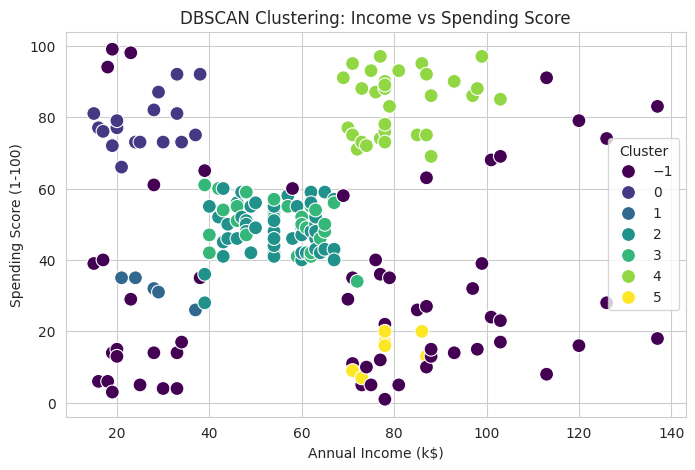

In [42]:
# 2D Scatter Plot (Using Two Features)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title="Cluster")
plt.show()

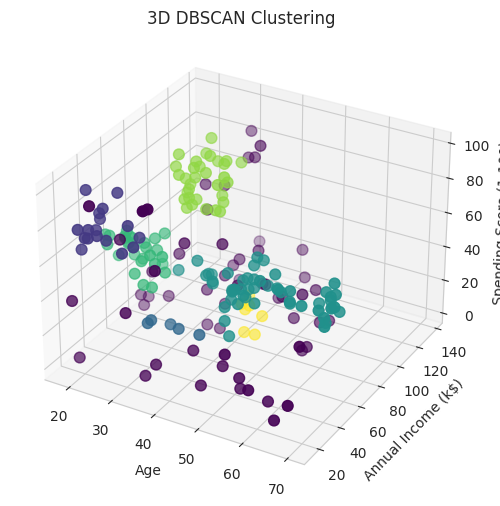

In [45]:
# 3D Scatter Plot (Age, Income, Spending Score)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D DBSCAN Clustering')
plt.show()

In [46]:
print(data['Cluster'].value_counts())

Cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64
